# The Magnus Effect:
## Analysis and Usefulness in Providing Clean Energy to Cargo Shipping

## Matt Tamasi

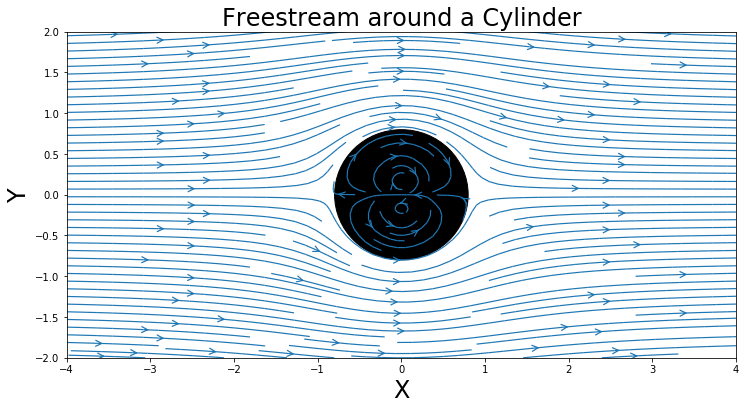

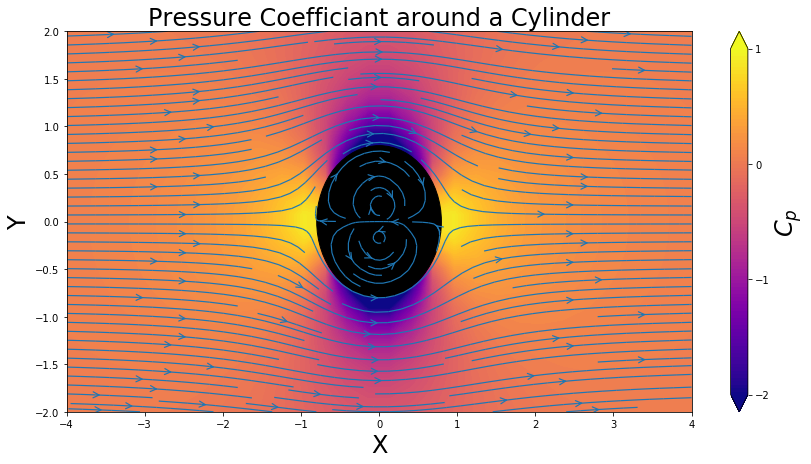

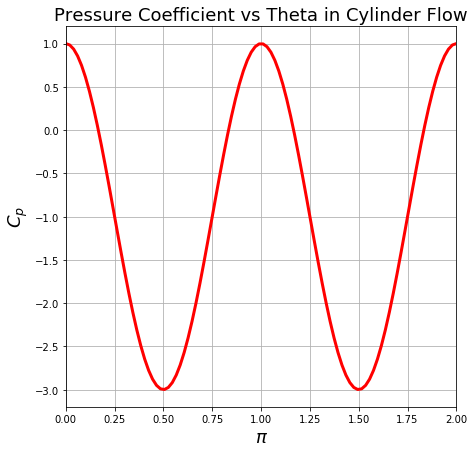

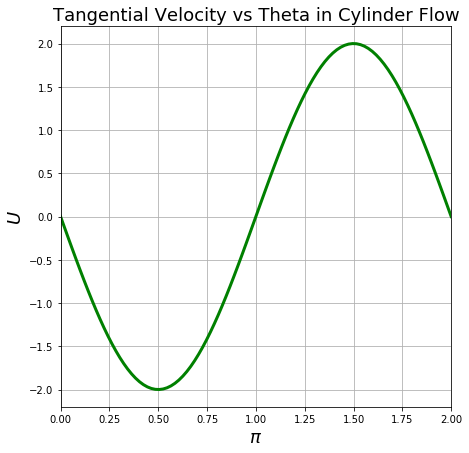

In [38]:
'''Importing needed modules to plot and do some math operations.'''

import math
import numpy
from matplotlib import pyplot as plt
%matplotlib inline

''' Here we are going to create a 2D mesh grid for our flow. The field with be
30 points (less clutter & faster to process) in each direction and we will 
make it 2x1 to give it a tube look.'''


N = 30                             # Number of points in each direction
x_start, x_end = -4.0, 4.0            # x-direction boundaries
y_start, y_end = -2.0, 2.0            # y-direction boundaries
x = numpy.linspace(x_start, x_end, N)    # computes a 1D-array for x
y = numpy.linspace(y_start, y_end, N)    # computes a 1D-array for y
X, Y = numpy.meshgrid(x, y)              # generates a mesh grid

''' Next we want to add a freeflow / freestream flow profile across the tube.'''

u_o = 1.0  # freestream magnitude
u_freestream = u_o * numpy.ones((N, N), dtype=float) #X-velocity components of the freestream
v_freestream = numpy.zeros((N, N), dtype=float) #Y-velocity components of the freestream
psi_freestream = u_o * Y


'''In order to model the magnus effect we need to combine the model of a doublet
(Source / Sink) pair with a vortex. First we will assign a doublet, and then a vortex
with corresponding u and v values for x and y components of the vector field correspondingly'''

k = 4.0 #Magnitude of the doublet                        
x_o, y_o = 0.0, 0.0 # Starting position of the doublet

u_doub = (-k / (2 * math.pi) *((X - x_o)**2 - (Y - y_o)**2) /((X - x_o)**2 + (Y - y_o)**2)**2)
v_doub = (-k / (2 * math.pi) *2 * (X - x_o) * (Y - y_o) /((X - x_o)**2 + (Y - y_o)**2)**2)

''' In addition to the u and v values across the mesh, we also want to retrieve
the streamfunction generated by the doublet.'''

psi_doub = -k / (2 * math.pi) * (Y - y_o) / ((X - x_o)**2 + (Y - y_o)**2)



'''Defining the overall flow u and v'''
u_flow = u_freestream + u_doub
v_flow = v_freestream + v_doub
'''Defining the overall stream-function'''
psi_flow = psi_freestream + psi_doub



'''Now what we want to do is investigate the doublet and freestream pair so
that we see the flow around a cylinder. This would represent a rotor that
is not turning.'''

#### Looking at the Freestream ####

width = 12 #Dimensionalizing the plot
height = (y_end - y_start) / (x_end - x_start) * width
fig, ax = plt.subplots(figsize = (width,height))
ax.streamplot(X, Y, u_flow, v_flow, density=1.5, linewidth=1.2, arrowsize=1.5, arrowstyle='->')
ax.set_title('Freestream around a Cylinder',fontsize = 24)
ax.set_xlabel('X',fontsize = 24)
ax.set_ylabel('Y',fontsize = 24)
R = math.sqrt(2*k / (2 * math.pi * 2*u_o))
C = plt.Circle((x_o,y_o),radius=R,color = 'black',alpha = 1)
ax.add_patch(C)

#### Looking at the pressure map ####

'''Here we are going to determine the pressure coefficient across the mesh field.
 According to Bournoulli's equations areas of increased velocity should report lower
 pressures to keep continuity across a space.'''

cp = 1.0 - (u_flow**2 + v_flow
        **2) / u_o**2

width = 14 #Dimensionalizing the plot
height = (y_end - y_start) / (x_end - x_start) * width
fig, ax2 = plt.subplots(figsize = (width,height))
ax2.streamplot(X, Y, u_flow, v_flow, density=1.5, linewidth=1.2, arrowsize=1.5, arrowstyle='->')
ax2.set_title('Pressure Coefficiant around a Cylinder',fontsize = 24)
ax2.set_xlabel('X',fontsize = 24)
ax2.set_ylabel('Y',fontsize = 24)
R = math.sqrt(2*k / (2 * math.pi * 2*u_o))
C = plt.Circle((x_o,y_o),radius=R,color = 'black',alpha = 1)
ax2.add_patch(C)
cmap = plt.cm.get_cmap("plasma")
contf = ax2.contourf(X, Y, cp,
                    levels=numpy.linspace(-2.0, 1.0, 100), extend='both',cmap=cmap)
cbar = plt.colorbar(contf)
cbar.set_label('$C_p$', fontsize=24)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])

'''We do in fact see that there is a pressure drop along the top and bottom of the cylinder which
is expected due to the finite space of the grid so it must squeeze when it comes
across an object. This pressure difference is directly representative of the velocity in the field as well.
'''

'''Now what we want to show is the tangential velocity profile and the pressure
profile along the theta of the cylinder. The velocity profile should peak at 
pi/2 and 3/2pi indicating the top and bottom where the flow is squeezed. The 
pressure coefficient shows a similar profile, having the highest pressure difference
at pi/2 and 3/2pi and showing a near 1 pressure coefficient near 0pi, pi, and 2pi
which indicates normal like flow.'''

'''Here we are creating an array to represent theta from 0 to 2pi then calculating
u_theta across theta and the pressure coefficient across theta.'''
theta = numpy.linspace(0.0, 2* math.pi, 100)
u_theta_no_vortex = -2 * u_o * numpy.sin(theta)
cp_no_vortex = 1.0 - (u_theta_no_vortex / u_o)**2

size = 7
plt.figure(figsize=(size, size))
plt.grid(True)
plt.xlabel(r'$\pi$', fontsize=18)
plt.ylabel('$C_p$', fontsize=18)
plt.xlim(theta.min(), 2)
plt.title('Pressure Coefficient vs Theta in Cylinder Flow',fontsize = 18)
plt.plot((theta/math.pi), cp_no_vortex,
             color='red', linewidth=3, linestyle='-')


size = 7
plt.figure(figsize=(size, size))
plt.grid(True)
plt.xlabel(r'$\pi$', fontsize=18)
plt.ylabel('$U$', fontsize=18)
plt.xlim(theta.min(), 2)
plt.title('Tangential Velocity vs Theta in Cylinder Flow',fontsize = 18)
plt.plot((theta/math.pi), u_theta_no_vortex,
             color='green', linewidth=3, linestyle='-')

'This shows that there is a much faster velocity profile going over the top side than the bottom\nside of the rotating cylinder. This makes sense as on the top side the flows are additive,\nwhile on the bottom the flows are subtractive.'

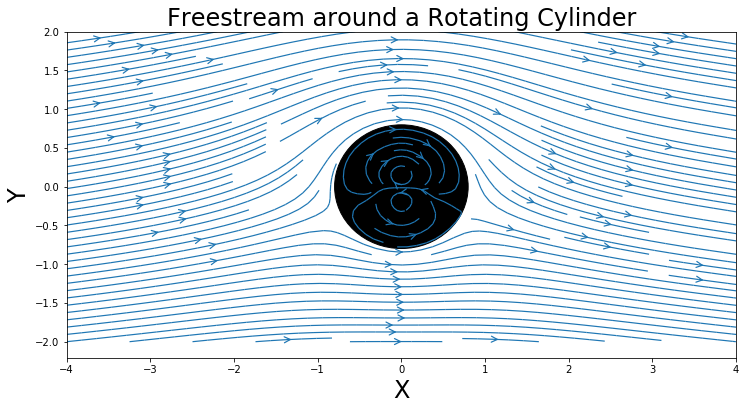

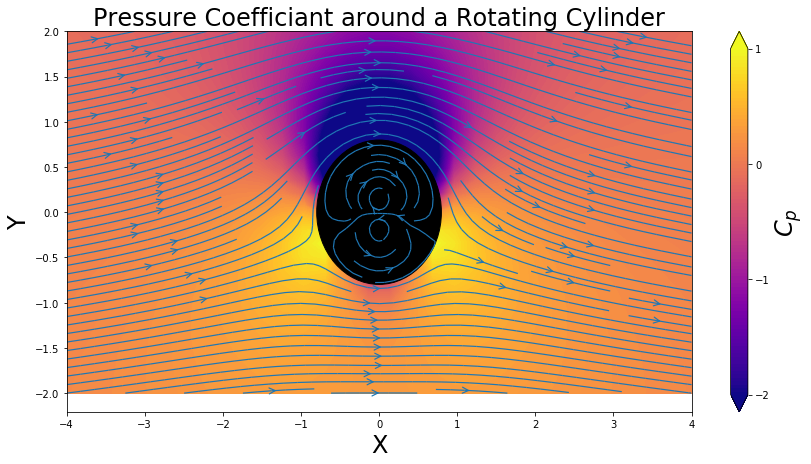

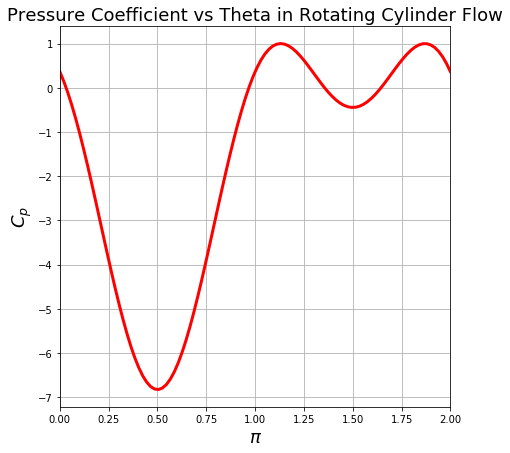

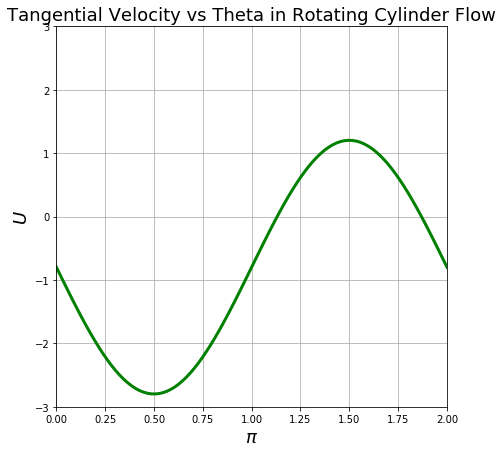

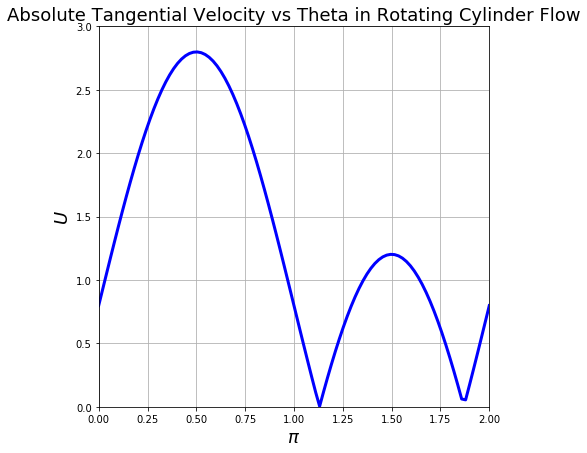

In [39]:
'''Now we want to model a cylinder that is moving. This can be done by adding a
vortex to the doublet. '''

gamma = 4 # This will be the strenght of the vortex
# x_o and y_o can stay the starting coordinates

# Computing the X and Y components of the vortex
u_vort = +gamma / (2 * math.pi) * (Y - y_o) / ((X - x_o)**2 + (Y - y_o)**2)
v_vort= -gamma / (2 * math.pi) * (X - x_o) / ((X - x_o)**2 + (Y - y_o)**2)

# Computing the stream-funciton of the vortex
psi_vort = gamma / (4 * math.pi) * numpy.log((X - x_o)**2 + (Y - y_o)**2)


'''We can now superimpose the new u and v velocities on the previous flow profile as well as on the streamfunction'''

'''Defining the overall flow u and v'''
u_flow = u_freestream + u_doub + u_vort
v_flow = v_freestream + v_doub + v_vort
'''Defining the overall stream-function'''
psi_flow = psi_freestream + psi_doub + psi_vort

#Looking again at the freestream, but this time with a vortex added to the doublet
width = 12 
height = (y_end - y_start) / (x_end - x_start) * width
fig, ax = plt.subplots(figsize = (width,height))
ax.streamplot(X, Y, u_flow, v_flow, density=1.5, linewidth=1.2, arrowsize=1.5, arrowstyle='->')
ax.set_title('Freestream around a Rotating Cylinder',fontsize = 24)
ax.set_xlabel('X',fontsize = 24)
ax.set_ylabel('Y',fontsize = 24)
R = math.sqrt(2*k / (2 * math.pi * 2*u_o))
C = plt.Circle((x_o,y_o),radius=R,color = 'black',alpha = 1)
ax.add_patch(C)

#### Looking at the pressure map, this time with a vortex added to the plot ####

cp = 1.0 - (u_flow**2 + v_flow
        **2) / u_o**2

width = 14 
height = (y_end - y_start) / (x_end - x_start) * width
fig, ax2 = plt.subplots(figsize = (width,height))
ax2.streamplot(X, Y, u_flow, v_flow, density=1.5, linewidth=1.2, arrowsize=1.5, arrowstyle='->')
ax2.set_title('Pressure Coefficiant around a Rotating Cylinder',fontsize = 24)
ax2.set_xlabel('X',fontsize = 24)
ax2.set_ylabel('Y',fontsize = 24)
R = math.sqrt(2*k / (2 * math.pi * 2*u_o))
C = plt.Circle((x_o,y_o),radius=R,color = 'black',alpha = 1)
ax2.add_patch(C)
cmap = plt.cm.get_cmap("plasma")
contf = ax2.contourf(X, Y, cp,
                    levels=numpy.linspace(-2.0, 1.0, 100), extend='both',cmap=cmap)
cbar = plt.colorbar(contf)
cbar.set_label('$C_p$', fontsize=24)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])


'''Again we are calculating both the tangential velocity and the coefficient of pressure as a 
function of theta.'''
theta = numpy.linspace(0.0, 2* math.pi, 100)
u_theta_vortex = -2 * u_o * numpy.sin(theta)- gamma / (2 * math.pi * R)
cp_vortex = 1.0 - (u_theta_vortex / u_o)**2

size = 7
plt.figure(figsize=(size, size))
plt.grid(True)
plt.xlabel(r'$\pi$', fontsize=18)
plt.ylabel('$C_p$', fontsize=18)
plt.xlim(theta.min(), 2)
plt.title('Pressure Coefficient vs Theta in Rotating Cylinder Flow',fontsize = 18)
plt.plot((theta/math.pi), cp_vortex,
             color='red', linewidth=3, linestyle='-')


size = 7
plt.figure(figsize=(size, size))
plt.grid(True)
plt.xlabel(r'$\pi$', fontsize=18)
plt.ylabel('$U$', fontsize=18)
plt.xlim(theta.min(), 2)
plt.ylim(-3,3)
plt.title('Tangential Velocity vs Theta in Rotating Cylinder Flow',fontsize = 18)
plt.plot((theta/math.pi), u_theta_vortex,
             color='green', linewidth=3, linestyle='-')

'''Now while the tangential velocity profile shows the velocity, its still taking direction into account.
For the magnus effect one visualization that would help with this is actually the absolute value of the
velocity so that the relative scale can be seen easily. Can use the absolute value function in numpy to
show this'''

size = 7
plt.figure(figsize=(size, size))
plt.grid(True)
plt.xlabel(r'$\pi$', fontsize=18)
plt.ylabel('$U$', fontsize=18)
plt.xlim(theta.min(), 2)
plt.ylim(0,3)
plt.title('Absolute Tangential Velocity vs Theta in Rotating Cylinder Flow',fontsize = 18)
plt.plot((theta/math.pi), numpy.absolute(u_theta_vortex),
             color='blue', linewidth=3, linestyle='-')

'''This shows that there is a much faster velocity profile going over the top side than the bottom
side of the rotating cylinder. This makes sense as on the top side the flows are additive,
while on the bottom the flows are subtractive.'''


In [40]:
'''IDEAS FOR THE NEXT SECTION HERE:
(1) Use NASAs explanation for the magnus effect calculations and applym them to this model.
most of them would not vary for a single cylinder.
(2) Look up Norsepower rotor schematics again and determine relative values that would be appropriate for ships
(3) Apply the theta and velocity approach to actual numbers and multipliers to create a thrust vs theta map
for the model.
'''



'IDEAS FOR THE NEXT SECTION HERE:\n(1) Use NASAs explanation for the magnus effect calculations and applym them to this model.\nmost of them would not vary for a single cylinder.\n(2) Look up Norsepower rotor schematics again and determine relative values that would be appropriate for ships\n(3) Apply the theta and velocity approach to actual numbers and multipliers to create a thrust vs theta map\nfor the model.\n'

The ratio of top flow to bottom flow is: 2.3285162757638846


'Given that the ratio of top to bottom flow is ~2 fold, if we look into the magnus effect we will see a net thrust upwards.'

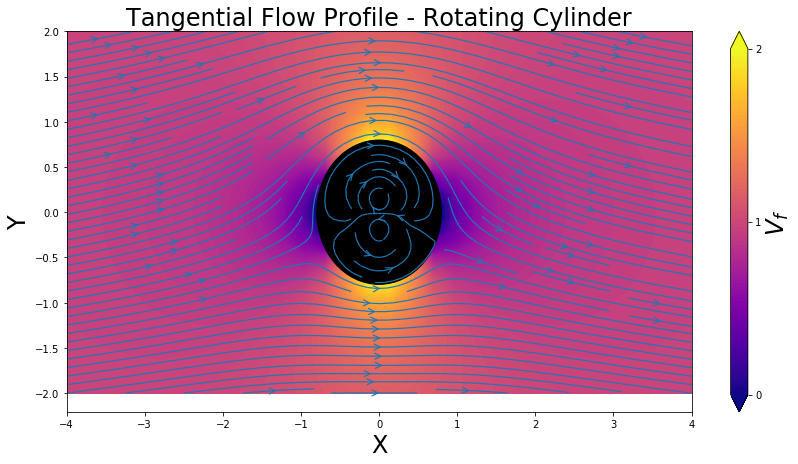

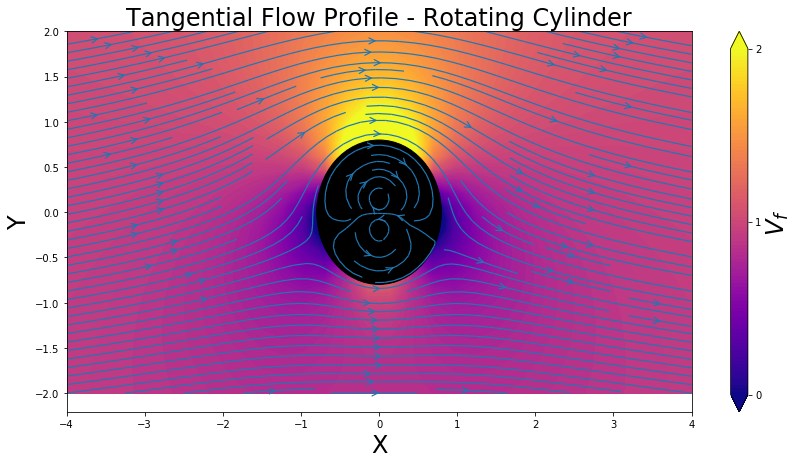

In [45]:

'''Lets start taking on some Rotor Thrust Modeling...

The magnitude of the lift force generated on a rotating cylnder was determined by Kutta and Joukowski...

L = p x V x G            G = Vortex Strength, V = Flow Velocity, p = density of flow
G = 2 x pi x r x Vr      r = radius of cylinder, Vr = rotational speed
Vr = 2 x pi x r x s      s = spin of cylinder (rev/min)'''

'''Would be interesting to isolate the tangential velocity at pi/2 and 3/2pi to look at the thrust difference being made due to
the vortex and freestream. We can start by looking at the velocity profile in a contour plot. This should be extremely similar to
the pressure coefficient plot. We can do this in a really simple way and assume that at the very top and bottom we are only looking
at X-related flow because that is tangential to the surface at pi/2 and 3/2pi. Thus mapping the x-flow we get...'''


u_freestream + u_doub
Flow = (u_flow)
width = 14 
height = (y_end - y_start) / (x_end - x_start) * width
fig, ax4 = plt.subplots(figsize = (width,height))
ax4.streamplot(X, Y, u_flow, v_flow, density=1.5, linewidth=1.2, arrowsize=1.5, arrowstyle='->')
ax4.set_title('Tangential Flow Profile - Rotating Cylinder',fontsize = 24)
ax4.set_xlabel('X',fontsize = 24)
ax4.set_ylabel('Y',fontsize = 24)
R = math.sqrt(2*k / (2 * math.pi * 2*u_o))
C = plt.Circle((x_o,y_o),radius=R,color = 'black',alpha = 1)
ax4.add_patch(C)
cmap = plt.cm.get_cmap("plasma")
contf = ax4.contourf(X, Y, u_freestream + u_doub,
                    levels=numpy.linspace(0, 2, 100), extend='both',cmap=cmap)
cbar = plt.colorbar(contf)
cbar.set_label('$V_f$', fontsize=24)
cbar.set_ticks([0.0, 1.0, 2.0, 3.0, 4.0])


Flow = (u_flow)
width = 14 
height = (y_end - y_start) / (x_end - x_start) * width
fig, ax4 = plt.subplots(figsize = (width,height))
ax4.streamplot(X, Y, u_flow, v_flow, density=1.5, linewidth=1.2, arrowsize=1.5, arrowstyle='->')
ax4.set_title('Tangential Flow Profile - Rotating Cylinder',fontsize = 24)
ax4.set_xlabel('X',fontsize = 24)
ax4.set_ylabel('Y',fontsize = 24)
R = math.sqrt(2*k / (2 * math.pi * 2*u_o))
C = plt.Circle((x_o,y_o),radius=R,color = 'black',alpha = 1)
ax4.add_patch(C)
cmap = plt.cm.get_cmap("plasma")
contf = ax4.contourf(X, Y, Flow,
                    levels=numpy.linspace(0, 2, 100), extend='both',cmap=cmap)
cbar = plt.colorbar(contf)
cbar.set_label('$V_f$', fontsize=24)
cbar.set_ticks([0.0, 1.0, 2.0, 3.0, 4.0])

#ax4.scatter(X,Y,color = 'k')



'''The point right above the top corresponds to index(21,14) and the point at the bttom corresponds to (8,14)
Indexes are (Row,Column) or (Y,X) in this mesh'''

F_Bot = Flow[(8,14)]
F_Top = Flow[(21,14)]

F_Ratio = F_Top/F_Bot

print('The ratio of top flow to bottom flow is: ' +str(F_Ratio))

'''Given that the ratio of top to bottom flow is ~2 fold, if we look into the magnus effect we will see a net thrust upwards.'''

In [42]:
'''Force Calculation Time:'''

'''The magnitude of the lift force generated on a rotating cylnder was determined by Kutta and Joukowski...

L = p x V x G            G = Vortex Strength, V = Flow Velocity, p = density of flow
G = 2 x pi x r x Vr      r = radius of cylinder, Vr = rotational speed
Vr = 2 x pi x r x s      s = spin of cylinder (rev/sec)


This means that the thrust generated is a function of tangential velocity across the top side of the cylinder (given the current
vortex directionality) and the bottom side of the cylinder.'''

'''
################################
NORSEPOWER - ROTOR DIMENSIONS:

Rotor Height x Diameter [m]: 18 x 3

Rotor Speed [rpm]: 0-250

Wind Speed Operation Range [m/s]: 0-25

** Reported Thrust: 100kN **

#################################
'''
'''Static Lift Example'''
Rotor_L = 18 # Rotor length in meters
Rotor_r = 1.5 # Rotor radius in meters
Rotor_s = 180/60 # Rotor spin

Vr = 2*math.pi*Rotor_r*Rotor_s

G = 2*math.pi*Rotor_r*Vr

p_air = 1.225 # Density of air at sea level
V_air = 10 #Velocity of wind (m/s)

Lift_Length = G * V_air * p_air
Lift = Lift_Length * Rotor_L


print('Current Lift force: ' + str(Lift) +' kN')

Current Lift force: 58758.6898018855 kN


<a list of 12 text.Text objects>

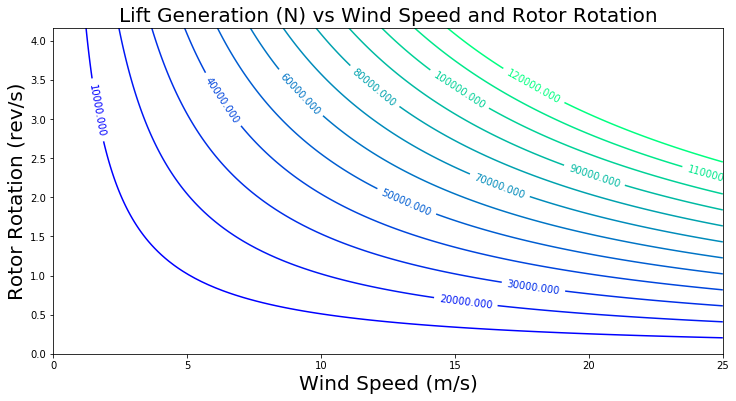

In [43]:
'''Now we will create 2 arrays representing different potential wind speed values and rotational speeds. These values correlate
with Norsepowers brochure'''

wind = numpy.linspace(0.0, 25, 100)
Rotation = numpy.linspace(0.0,(250/60),100)

X2, Y2 = numpy.meshgrid(wind, Rotation)              # generates a mesh grid

''' Multiplying everything together by jutta-joukowski theorem gives us a lift profile, which we can then plot using contour
lines.'''
Lift_Profile = p_air*(X2)*(Y2)*2*math.pi*Rotor_r*2*math.pi*Rotor_r*Rotor_L

width = 12 #Dimensionalizing the plot
height = (y_end - y_start) / (x_end - x_start) * width
fig, ax2 = plt.subplots(figsize = (width,height))
ax2.set_title('Lift Generation (N) vs Wind Speed and Rotor Rotation',fontsize = 20)
ax2.set_xlabel('Wind Speed (m/s)',fontsize = 20)
ax2.set_ylabel('Rotor Rotation (rev/s)',fontsize = 20)
cmap = plt.cm.get_cmap("winter")
contf = ax2.contour(X2, Y2, Lift_Profile,
                    levels=numpy.linspace(0.0, 120000.0, 13), extend='both',cmap=cmap)
ax2.clabel(contf, inline = 1,fontsize = 10)

<a list of 15 text.Text objects>

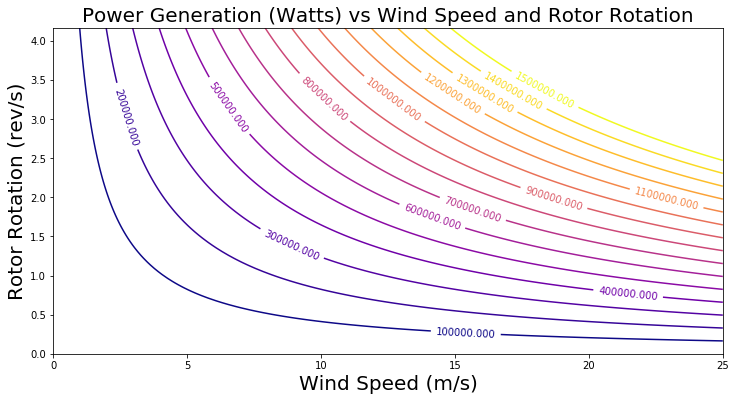

In [44]:
''' Next we can look at the actual power generation of the thrust of these rotor sails.
To convert thrust to power we will just use P = F*v and we will assume a constant velocity
for the ship at some point in its voyage.

Cargo vessels average around 24 knots during their voyages which converts to 
~ 12.4 m/s so we will set velocity v to 12.4 m/s'''

Ship_V = 12.4
Power_Profile = Lift_Profile * Ship_V

width = 12 #Dimensionalizing the plot
height = (y_end - y_start) / (x_end - x_start) * width
fig, ax2 = plt.subplots(figsize = (width,height))
ax2.set_title('Power Generation (Watts) vs Wind Speed and Rotor Rotation',fontsize = 20)
ax2.set_xlabel('Wind Speed (m/s)',fontsize = 20)
ax2.set_ylabel('Rotor Rotation (rev/s)',fontsize = 20)
cmap = plt.cm.get_cmap("plasma")
contf = ax2.contour(X2, Y2, Power_Profile,
                    levels=numpy.linspace(0.0, 1500000.0, 16), extend='both',cmap=cmap)
ax2.clabel(contf, inline = 1,fontsize = 10)